<a href="https://colab.research.google.com/github/sbawari20/Stock-Market-Analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
start = datetime.datetime(2012,1,1)
end   = datetime.datetime(2017,1,1)

In [4]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
tesla = web.DataReader("TSLA",'yahoo',start,end)
ford  = web.DataReader("F",'yahoo',start,end)
gm    = web.DataReader("GM",'yahoo',start,end)

In [6]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500,1.872000
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500,1.847333
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500,1.808000
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500,1.794000
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000,1.816667


In [7]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.269925
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.380962
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.570387
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.648769
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.707558


In [8]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.232351
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.309469
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.096020
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.674370
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.612680


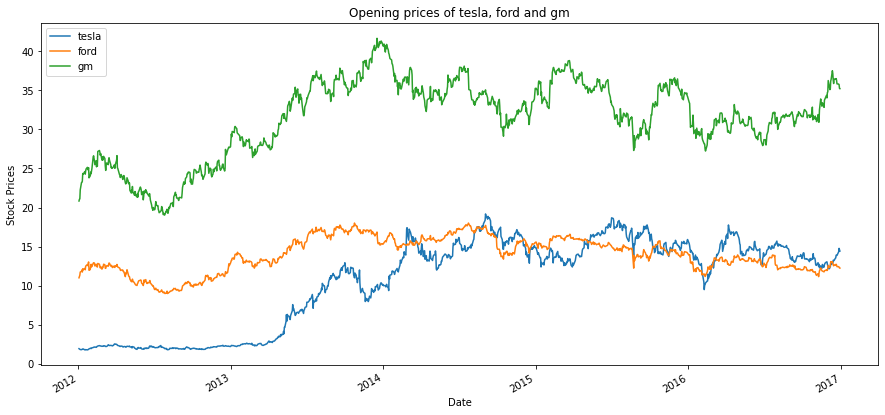

In [9]:
tesla['Open'].plot(label='tesla', figsize=(15,7))
ford['Open'].plot(label='ford')
gm['Open'].plot(label='gm')
plt.legend()
plt.title('Opening prices of tesla, ford and gm')
plt.ylabel('Stock Prices')
plt.show()

Text(0.5, 1.0, 'volume')

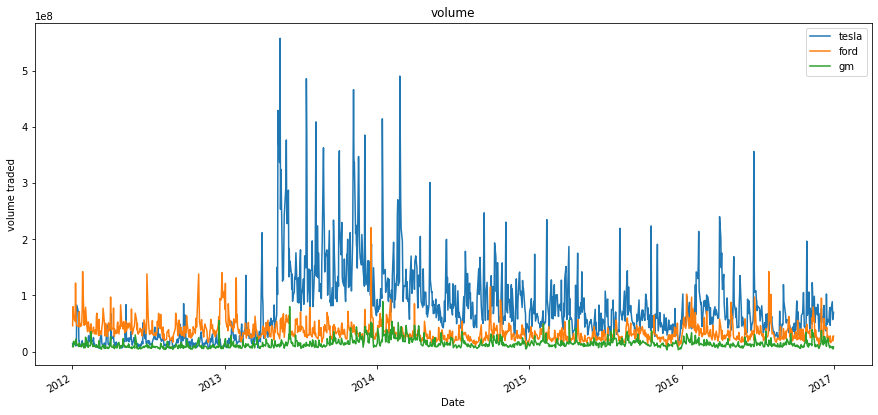

In [10]:
tesla['Volume'].plot(label='tesla',figsize=(15,7))
ford['Volume'].plot(label='ford')
gm['Volume'].plot(label='gm')
plt.legend()
plt.ylabel('volume traded')
plt.title('volume')

In [11]:
tesla['Total Traded']=tesla['Volume']*tesla['Open']
ford['Total Traded']=tesla['Volume']*ford['Open']
gm['Total Traded']=tesla['Volume']*gm['Open']

In [57]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500,1.872000,2.685921e+07
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500,1.847333,1.777512e+07
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500,1.808000,2.791269e+07
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500,1.794000,2.682736e+07
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000,1.816667,2.421900e+07


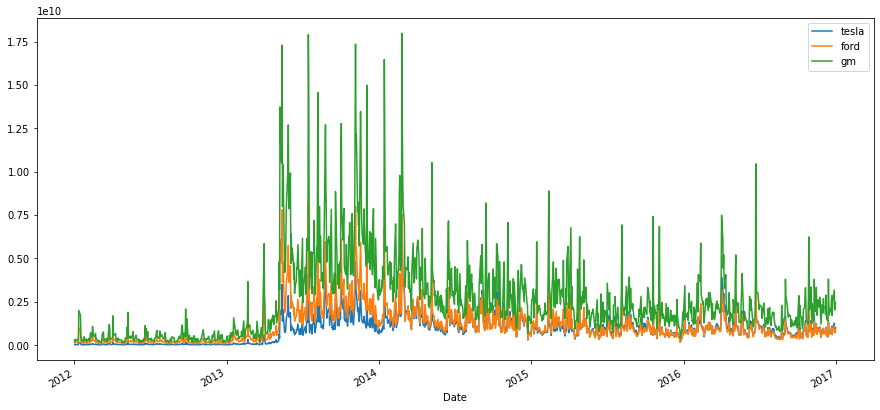

In [12]:
tesla['Total Traded'].plot(label='tesla',figsize=(15,7))
ford['Total Traded'].plot(label='ford')
gm['Total Traded'].plot(label='gm')
plt.legend()
plt.show()

In [13]:
gm.iloc[[gm['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2014-02-25,36.799999,35.990002,36.669998,36.099998,22504100.0,27.837904,1.797657e+10


In [14]:
tesla.iloc[[tesla['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2014-02-25,17.280001,15.23,15.333333,16.533333,490225500,16.533333,7.516791e+09


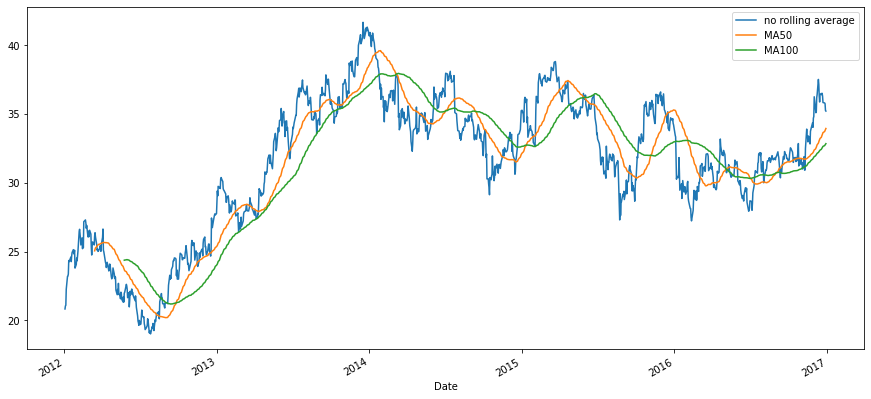

In [15]:
gm['Open'].plot(label='no rolling average',figsize=(15,7))
gm['MA50']=gm['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')
gm['MA100']=gm['Open'].rolling(100).mean()
gm['MA100'].plot(label='MA100')
plt.legend()

In [16]:
#other methods which can be used are alter regression model, alter correlation, ewma etc
#as here without using moving average the graph is too noisy 
#and while using it the graph misses some trends 

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
#correlation and scalar matrices
car_comp=pd.concat([tesla['Open'],ford['Open'],gm['Open']],axis=1)
car_comp.columns=['Tesla Open','Ford Open','Gm Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f372dc99150>,
      dtype=object)

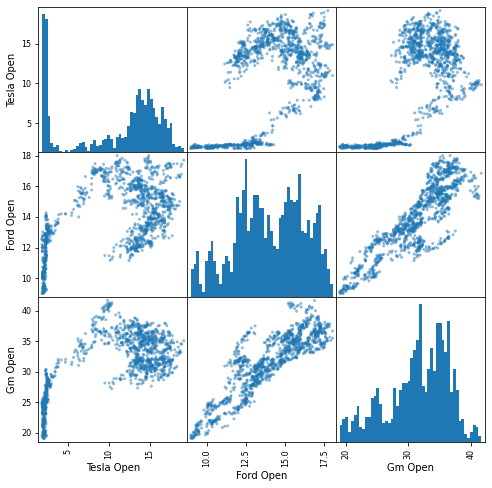

In [78]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50})

In [19]:
import mplfinance as mpf

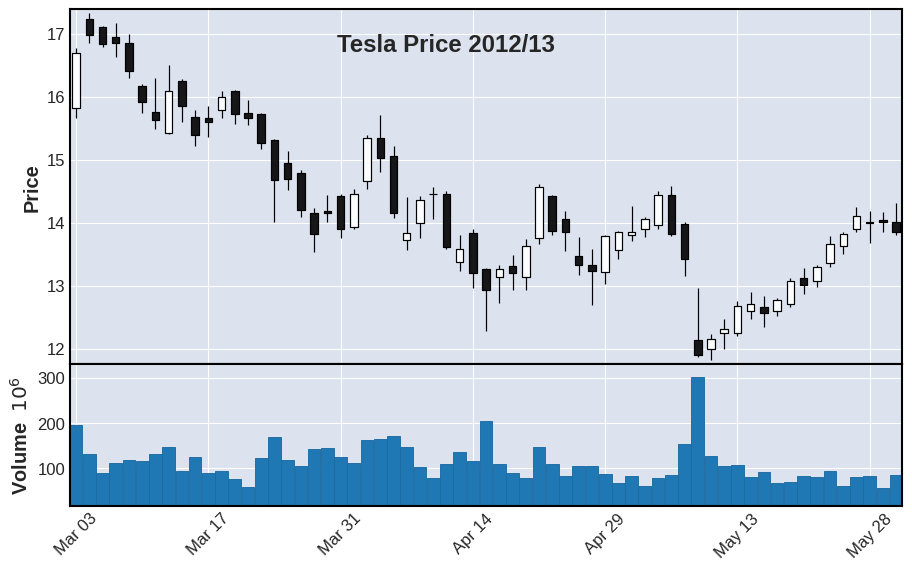

In [40]:
mpf.plot(tesla['2014-03':'2014-05'],figratio=(20,12),type='candle',volume=True,title='Tesla Price 2012/13',tight_layout=True)

In [100]:
tesla['returns']=tesla['Close']/tesla['Close'].shift(1)-1
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cummulative Returns
Date,,,,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500,1.872000,2.685921e+07,NaN,1.013353
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500,1.847333,1.777512e+07,-0.013177,1.035398
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500,1.808000,2.791269e+07,-0.021292,1.043478
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500,1.794000,2.682736e+07,-0.007743,1.030459
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000,1.816667,2.421900e+07,0.012635,1.016655


In [102]:
ford['returns']=ford['Close']/ford['Close'].shift(1)-1
gm['returns']=gm['Close']/gm['Close'].shift(1)-1
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cummulative Returns
Date,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.269925,1.531365e+08,NaN,0.984956
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.380962,1.053842e+08,0.015274,0.960311
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.570387,1.708847e+08,0.025664,0.950470
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.648769,1.736874e+08,0.010354,0.943220
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.707558,1.591726e+08,0.007686,0.943220


In [103]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,returns,Cummulative Returns
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.232351,2.899848e+08,NaN,NaN,NaN,0.995272
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.309469,1.989541e+08,NaN,NaN,0.004751,0.949481
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.096020,3.182408e+08,NaN,NaN,0.048227,0.918412
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.674370,3.293256e+08,NaN,NaN,0.033829,0.921629
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.612680,3.121560e+08,NaN,NaN,-0.003490,0.905766


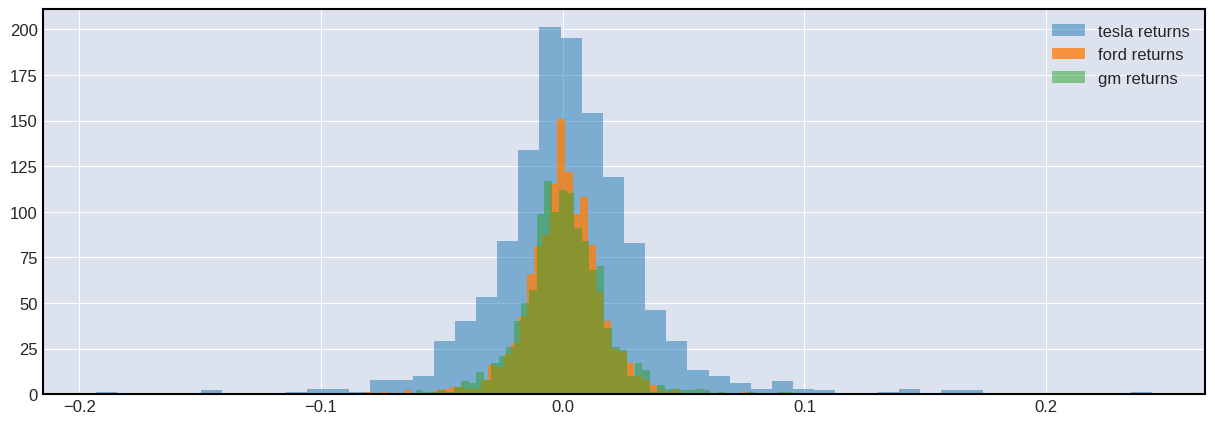

In [104]:
#the more the curve is streached the more the stock is volatile
tesla['returns'].hist(bins=50, label='tesla returns',alpha=0.5,figsize=(15,5))
ford['returns'].hist(bins=50, label='ford returns',alpha=0.8)
gm['returns'].hist(bins=50, label='gm returns',alpha=0.5)
plt.legend()

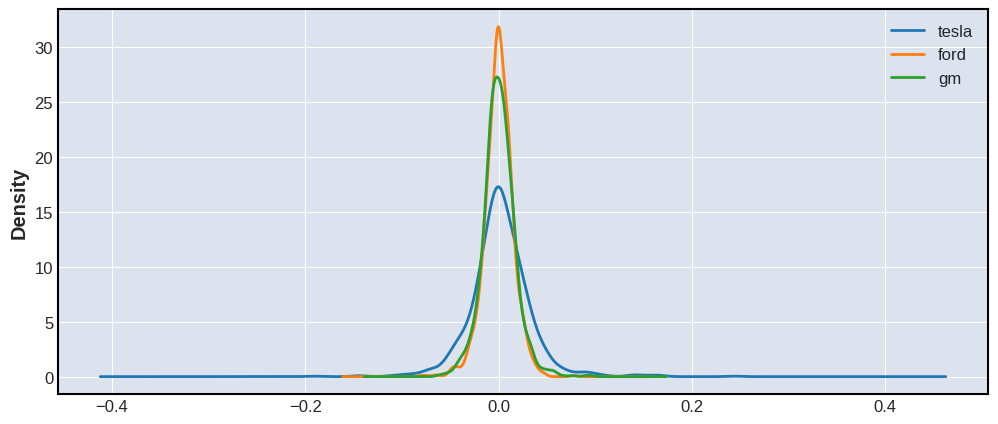

In [105]:
#kde (kernel density estimate) probability distribution curve
tesla['returns'].plot(kind='kde',label='tesla',figsize=(12,5))
ford['returns'].plot(kind='kde',label='ford',figsize=(12,5))
gm['returns'].plot(kind='kde',label='gm',figsize=(12,5))
plt.legend()
#again the more streched the more the volatility
#here the height of tesla lowered as it is a probability distribution function which is normalised and the areas of the three curve is constant. 

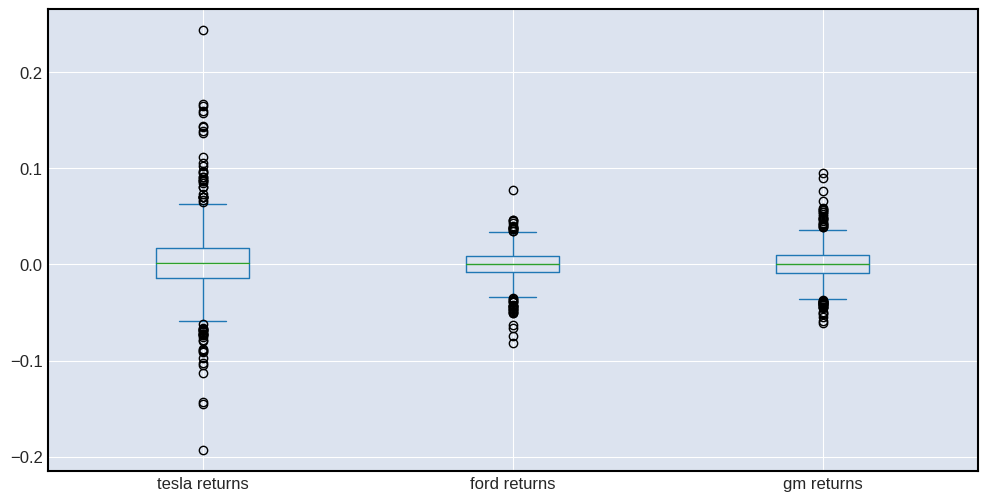

In [106]:
box_df=pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns=['tesla returns','ford returns', 'gm returns']
box_df.plot(kind='box',figsize=(12,6))
#here we can see that on each day the tesla shares are fluctuating more as compared to other two companies, or tesla is more volatile compared to others

In [ ]:
#error??
scatter_matrix(box_df, figsize=(8,8),hist_kwds={'bins':50})

In [108]:
tesla['Cummulative Returns']=(1+tesla['returns']).cumprod()
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cummulative Returns
Date,,,,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500,1.872000,2.685921e+07,NaN,NaN
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500,1.847333,1.777512e+07,-0.013177,0.986823
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500,1.808000,2.791269e+07,-0.021292,0.965812
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500,1.794000,2.682736e+07,-0.007743,0.958333
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000,1.816667,2.421900e+07,0.012635,0.970442


In [109]:
ford['Cummulative Returns']=(1+ford['returns']).cumprod()
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cummulative Returns
Date,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.269925,1.531365e+08,NaN,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.380962,1.053842e+08,0.015274,1.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.570387,1.708847e+08,0.025664,1.041330
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.648769,1.736874e+08,0.010354,1.052111
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.707558,1.591726e+08,0.007686,1.060198


In [110]:
gm['Cummulative Returns']=(1+gm['returns']).cumprod()
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,returns,Cummulative Returns
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.232351,2.899848e+08,NaN,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.309469,1.989541e+08,NaN,NaN,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.096020,3.182408e+08,NaN,NaN,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.674370,3.293256e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.612680,3.121560e+08,NaN,NaN,-0.003490,1.085036


Text(0.5, 1.0, 'Cummulative returns vs time')

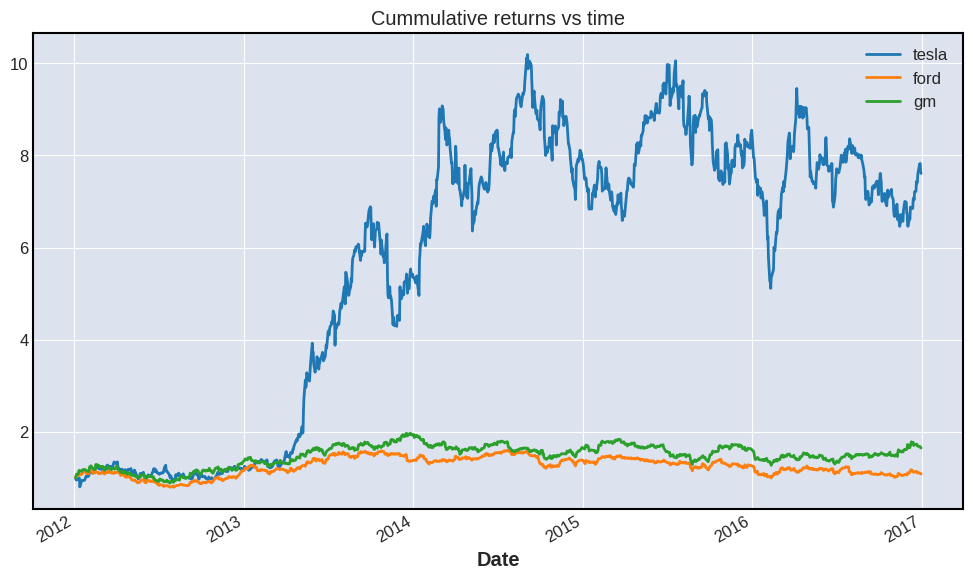

In [111]:
tesla['Cummulative Returns'].plot(label='tesla',figsize=(12,7))
ford['Cummulative Returns'].plot(label='ford')
gm['Cummulative Returns'].plot(label='gm')
plt.legend()
plt.title('Cummulative returns vs time')